### Simple PCA

[[  3.00517511e+00   2.51176857e-16]
 [  2.51176857e-16   9.86080427e-01]]


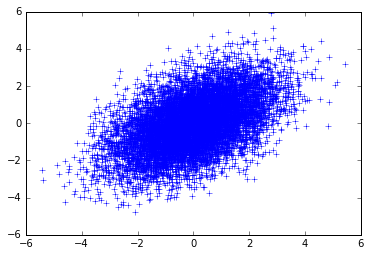

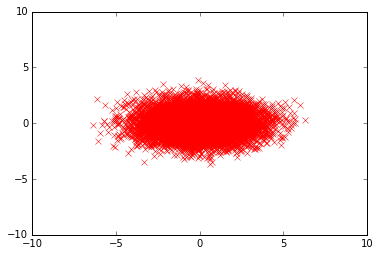

In [36]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#covariance version of PCA
data = np.random.multivariate_normal(np.zeros(2),np.array([[2,1],[1,2]]),10000)
plt.plot(data[:,0],data[:,1],'+')

C = np.dot(data.T,data)/len(data)

#eigenvalues are roughly 1 or 3
#so eigenvalues are roughly [-1,1] and [1,1] for those two eigenvalues

a = np.linalg.svd(C)
#W = np.array([[1,1],[-1,1]])
W = a[0]
newdata = np.dot(data,W.T)
plt.figure()
plt.plot(newdata[:,0],newdata[:,1],'rx')
plt.xlim([-10,10])
plt.ylim([-10,10])
print np.dot(newdata.T,newdata)/len(newdata) #now uncorrelated.

### Variance along a vector

If covariance of x is C, what is the variance along a vector v?

$v^\top C v$

Why?

To find the variance along $v$ it makes it easier if we were to rotate the matrix $C$ so that $v$ is along the x axis.

Let $R$ be a matrix, which does this transform.

Imagine also that we're interested in transforming the hyperspheroid ($C^{1/2}$)

The new covariance matrix will be: $C'^{1/2} = R^\top C^{1/2}$

So we can read off the first column of this new matrix $C'^{1/2}$

Note that the other columns of the matrix aren't of interest to us, so this means the other columns of $R$ aren't of interest to us either. The only one that matters is the one that, turns out, equals $v$. So we can get the positions of points along the new vector from just $v^\top x$. Or for the size of the hyperspheroid in that direction, $\sigma = v^\top C^{1/2}$. So what's the variance along this axis now? It's 

$$\sigma^2 = (v^\top C^{1/2}) (v^\top C^{1/2})^\top = v^\top C^{1/2} C^{1/2^\top} v$$

Which is $$v^\top C v$$

Below is a numerical example

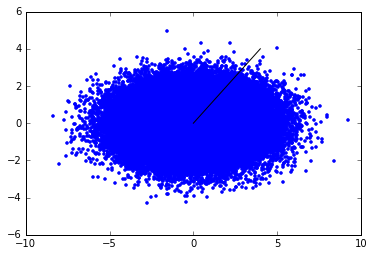

In [112]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

mu = np.array([0,0])
C = np.array([[4,0],[0,1]])
samples = np.random.multivariate_normal(mu,C,100000)

plt.plot(samples[:,0],samples[:,1],'.')
plt.plot([0,4],[0,4],'k-')

#projecting points onto that line...
v = np.array([1,1])/np.sqrt(2)

R = np.array([[1,1],[-1,1]]) * np.sqrt(1/2.0) #we don't care about second part of R (hence we can get away with wrong numbers)
newsamples = np.zeros_like(samples)
for i in range(len(samples)):
    sample = samples[i,:]
    newsample = np.dot(R,sample)
    #plt.plot([sample[0],newsample[0]],[sample[1],newsample[1]],'-')
    newsamples[i,:] = newsample

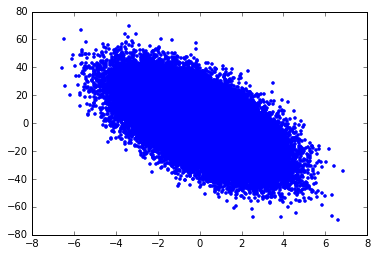

In [108]:
plt.plot(newsamples[:,0],newsamples[:,1],'.')


In [109]:
act_var = []
strap_size = 100
for bootstrap in range(0,len(newsamples),strap_size):
    act_var.append(np.dot(newsamples[bootstrap:(bootstrap+strap_size),0], newsamples[bootstrap:(bootstrap+strap_size),0])/strap_size)
act_var = np.array(act_var)

print "variance lies between %0.2f and %0.2f." % (np.mean(act_var)-np.std(act_var)/np.sqrt(len(act_var))*1.96,np.mean(act_var)+np.std(act_var)/np.sqrt(len(act_var))*1.96)

variance lies between 2.49 and 2.54.


In [106]:
print np.dot(np.dot(v,C),v)

2.5


###EM for Gaussian Mixtures
